This notebook presents my interactive notes about pandas nicely formatted, organised and translated to english.

In [1]:
import pandas as pd
import numpy as np
import gc
import os
from IPython.display import display
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'Exploratory Data Analysis.ipynb',
 'kaggle',
 'Pandas.ipynb',
 'Pandas2.ipynb',
 'README.md',
 'StrataScratch Interview Questions.ipynb']

In [3]:
os.listdir('kaggle')

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

In [4]:
products = pd.read_csv('kaggle\olist_products_dataset.csv')

In [5]:
def categorise_weight(row):  
    if row['product_weight_g'] <= 500:
        return 'light'
    elif row['product_weight_g'] > 500 and row['product_weight_g'] <= 1900 :
        return 'medium'
    elif row['product_weight_g'] > 1900:
        return 'heavy'

In [6]:
products['weight_category'] = products.apply(lambda row: categorise_weight(row), axis=1)

## Overall tips

using inplace=True is no faster tha using regular df = df.(...).

inplace=False should be used for live debugging, to see what changes our code made to data. (If size is significant all code should be developed and dested on smaller samples)

In [7]:
# use copy to not get reference, changing reference will change the data it is referencing to
temp = products.copy()
temp.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,weight_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,light
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,medium
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,light


In [8]:
temp = temp.set_index(['product_id']).head(3)
# indexed.set_index(['product_id'], inplace=True)
temp.head(3)

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,weight_category
product_id,,,,,,,,,
1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,light
3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,medium
96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,light


Normalized row and column selection

.drop(), .rename(), .reindex() can use argument axis=1/0 or 'column'/'row' to selecto columns and rows, or columns=() to select columns and index=() to select rows.

In [9]:
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,weight_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,light
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,medium
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,light


In [10]:
products.drop(0, axis='rows').head(3)
products.drop(index=(0)).head(3)
products.drop('product_id', axis='columns').head(3)
products.drop(columns=('product_id')).head(3)

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,weight_category
0,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,light
1,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,medium
2,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,light


df.rename() - renaming columns and indexes
* mapper = dictionary of old and new names, or function like str.lower
* index, columns, axis
* level = for multiindexed data
* errors

In [11]:
products.columns.str.replace('_', ' ')
products.rename({'product_id' : 'id of the product'}, axis='columns').head(2)

# products.index.apply()  doeson't work
products.rename(lambda x: float(x)*10, axis='rows').head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,weight_category
0.0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,light
10.0,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,medium


Smallest and biggest values

In [12]:
products.product_weight_g.nlargest(5)
products.product_weight_g.nsmallest(5)

9769     0.0
13683    0.0
14997    0.0
32079    0.0
9396     2.0
Name: product_weight_g, dtype: float64

Selecting rows belonging to 3 most popular categories

In [13]:
temp = products.product_category_name.value_counts()
products[products.product_category_name.isin(temp.nlargest(3).index)].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,weight_category
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,light
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0,medium
10,14aa47b7fe5c25522b47b4b29c98dcb9,cama_mesa_banho,54.0,630.0,1.0,1100.0,16.0,10.0,16.0,medium
13,7bb6f29c2be57716194f96496660c7c2,moveis_decoracao,51.0,2083.0,2.0,600.0,68.0,11.0,13.0,medium
15,3bb7f144022e6732727d8d838a7b13b3,esporte_lazer,22.0,3021.0,1.0,800.0,16.0,2.0,11.0,medium


Boolean conditions are chaindes using '|' and '&' not 'and' and 'not'

In [14]:
products.loc[products.product_category_name.isin(['esporte_lazer', 'moveis_decoracao']) 
         & products.product_weight_g<500, :].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,weight_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,light
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,medium
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,light
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,light
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,medium


Conditional changes trick

In [15]:
products.loc[products.weight_category=='heavy', 'product_weight_g'] *= 1
products.loc[products.weight_category=='heavy', 'product_weight_g']

6        18350.0
11        7150.0
20        2550.0
26        3600.0
29        3600.0
          ...   
32941     9550.0
32942     2200.0
32943     6150.0
32946    12300.0
32950     2083.0
Name: product_weight_g, Length: 8093, dtype: float64

**Reading Clipboard**  (from excel)

In [16]:
temp = pd.read_clipboard()
temp

,products['weight_category'],=,products.apply(lambda,row:,"categorise_weight(row),",axis=1)


If one columns' values are lists of items, each item can be transofrmed to have its own column

In [17]:
df1 = pd.DataFrame([[['a', 1]], [['b', 2]], [['c', 3]], [['d', 4]]], columns=['my_data'])
df1

,my_data
0,"[a, 1]"
1,"[b, 2]"
2,"[c, 3]"
3,"[d, 4]"


In [18]:
pd.DataFrame(df1.my_data.tolist())

,0,1
0,a,1
1,b,2
2,c,3
3,d,4


## Initial Analysis

In [19]:
# products.dtypes
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
 9   weight_category             32949 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


In [20]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
weight_category                 2
dtype: int64

In [21]:
products.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [22]:
products.mean(numeric_only=True, axis='rows')

product_name_lenght             48.476949
product_description_lenght     771.495285
product_photos_qty               2.188986
product_weight_g              2276.472488
product_length_cm               30.815078
product_height_cm               16.937661
product_width_cm                23.196728
dtype: float64

In [23]:
corr = products.corr()

In [24]:
y_labels = corr.index.str.replace('_', ' ').str.title()
x_labels = [label.replace(' ', '\n') for label in y_labels]

In [25]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
mask

array([[0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0.]])

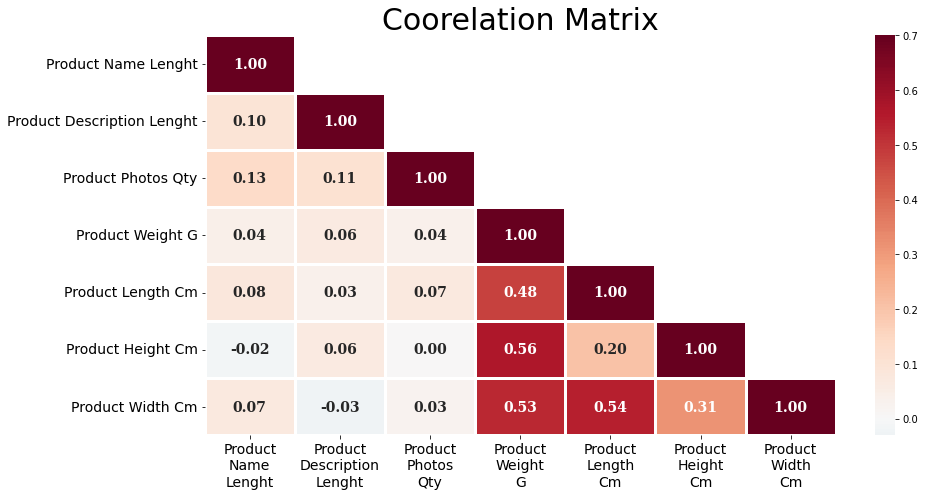

In [26]:
plt.figure(figsize=(len(y_labels)*2, 7))
p = sns.heatmap(data=corr,
                cmap='RdBu_r',
                annot=True,
                annot_kws={'fontsize':14, 'fontweight': 'bold', 'fontfamily': 'serif'},
                fmt='.2f',
                linewidth=3,
                linecolor='white',
                mask=mask,

                xticklabels=x_labels,
                yticklabels=y_labels,
                center=0,
                vmax=0.7,
               )


p.set_title('Coorelation Matrix', fontsize=30)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticklabels=[]
plt.tight_layout()

In [27]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [28]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
products.select_dtypes(include=numerics).idxmin() # .idxmax()

product_name_lenght           12826
product_description_lenght     3601
product_photos_qty                0
product_weight_g               9769
product_length_cm             30345
product_height_cm                15
product_width_cm                961
dtype: int64

df.sample()
* frac= fraction of all rows
* replace= sample with replacement (repeats)
* weights= how each row is likely to be sampled
* random_state=

In [29]:
products.sample() #.tail() # .head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,weight_category
1168,f2f960ea3804c29b5e5834c34082a0f4,fashion_esporte,51.0,511.0,2.0,200.0,16.0,12.0,12.0,light


In [30]:
# splitting dataframe into two random samples

products_temp_1 = products.sample(frac=0.75, random_state=3).sort_index().copy()
products_temp_2 = products.drop(products_temp_1.index).copy()

In [31]:
products_temp_1.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,weight_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,light
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,medium
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0,light


In [32]:
products_temp_2.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,weight_category
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,light
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,light
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,medium


## Dataframe

In [33]:
# adding new column (returns copy)
products.assign(product_weight_kg=products.product_weight_g/1000).head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,weight_category,product_weight_kg
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,light,0.225
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,medium,1.000
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,light,0.154


In [34]:
# list(products.items())[:2]
# list(products.iterrows())[:2]
# list(products.itertuples())[:2]

## .loc .iloc

It is better to use .loc[], or .iloc[] than regular []. In python language it is better to be explicit and do not leave room for assumptions.

.loc[] if for labels (also for index labels), .iloc[] for indexes.

In [35]:
# .loc/iloc[rows(index), columns]

In [36]:
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,weight_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,light
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,medium
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,light


In [37]:
products.loc[0:10, :].head(3)   # works because index labels are indexes

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,weight_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,light
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,medium
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,light


In [38]:
products.loc[:, 'product_weight_g':'product_width_cm'].head(3)

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,225.0,16.0,10.0,14.0
1,1000.0,30.0,18.0,20.0
2,154.0,18.0,9.0,15.0


In [39]:
# selects all rows and columns except the last one,
# usefull when the last column is target and we want to divide data to X and y
products.iloc[:, :-1].shape

(32951, 9)

In [40]:
# as arguments in can take anything, even a lambda function that returns series/ datafrane of rows/ columns to select
index_series = products['product_weight_g']<250 
products.loc[index_series, ['product_id', 'product_weight_g']].head()

,product_id,product_weight_g
0,1e9e8ef04dbcff4541ed26657ea517e5,225.0
2,96bd76ec8810374ed1b65e291975717f,154.0
5,41d3672d4792049fa1779bb35283ed13,200.0
14,eb31436580a610f202c859463d8c7415,200.0
22,e3e020af31d4d89d2602272b315c3f6e,75.0


Reversing order of items and columns in dataframe

In [41]:
products.loc[::-1,::-1].head(3) #  .reset_index() 

,weight_category,product_width_cm,product_height_cm,product_length_cm,product_weight_g,product_photos_qty,product_description_lenght,product_name_lenght,product_category_name,product_id
32950,heavy,7.0,2.0,12.0,2083.0,1.0,309.0,58.0,cama_mesa_banho,106392145fca363410d287a815be6de4
32949,medium,20.0,13.0,31.0,700.0,2.0,156.0,60.0,informatica_acessorios,83808703fc0706a22e264b9d75f04a2e
32948,medium,27.0,7.0,27.0,1400.0,1.0,799.0,50.0,cama_mesa_banho,9a7c6041fa9592d9d9ef6cfe62a71f8c


After deprecation of ix tricks can be used to select suing labels and positions at the same itme.

In [42]:
temp = products.copy()
temp.index = products.index.astype(str) + '_ix'

In [43]:
# row (index) labels and column positions
temp.loc['1_ix': '5_ix', temp.columns[::2]]

# row position and column labels
temp.loc[temp.index[1:6], 'product_name_lenght': 'product_width_cm']

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1_ix,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2_ix,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3_ix,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4_ix,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5_ix,60.0,745.0,1.0,200.0,38.0,5.0,11.0


## Index

reset_index() - resets index ans uses default one (range)
* drop= whether to keep old index as column

In [44]:
products.reset_index(drop=True).head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,weight_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,light
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,medium
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,light


set_index()
* keys
* drop= delete column if using it as new index (must be refenreced as string)
* append= whetehr to append to existing index

In [45]:
products.set_index(products.product_id, append=True).head().index

MultiIndex([(0, '1e9e8ef04dbcff4541ed26657ea517e5'),
            (1, '3aa071139cb16b67ca9e5dea641aaa2f'),
            (2, '96bd76ec8810374ed1b65e291975717f'),
            (3, 'cef67bcfe19066a932b7673e239eb23d'),
            (4, '9dc1a7de274444849c219cff195d0b71')],
           names=[None, 'product_id'])

In [46]:
products.index.name='my_index'
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,weight_category
my_index,,,,,,,,,,
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,light
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,medium
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,light
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,light
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,medium


## Multiindex

In [47]:
# temp = products.set_index(['product_category_name', 'weight_category'])
temp = products.set_index(['product_category_name', 'weight_category']).sort_index()
temp.head()

product_id  \
product_category_name     weight_category                                     
agro_industria_e_comercio heavy            07f01b6fcacc1b187a71e5074199db2d   
                          heavy            51d1db0b0ed8fee9994a5bae549a6160   
                          heavy            0b2a1288e8ba64c797e7586c8df75602   
                          heavy            3e3f442db862cb6fe99389a41b7acb84   
                          heavy            423a6644f0aa529e8828ff1f91003690   

                                           product_name_lenght  \
product_category_name     weight_category                        
agro_industria_e_comercio heavy                           39.0   
                          heavy                           41.0   
                          heavy                           38.0   
                          heavy                           60.0   
                          heavy                           54.0   

                                           product_description_lenght  \
product_category_name     weight_category                               
agro_industria_e_comercio heavy                                 430.0   
                          heavy                                 288.0   
                          heavy                                 397.0   
                          heavy                                 638.0   
                          heavy                                2352.0   

                                           product_photos_qty  \
product_category_name     weight_category                       
agro_industria_e_comercio heavy                           1.0   
                          heavy                           1.0   
                          heavy                           1.0   
                          heavy                           6.0   
                          heavy                           3.0   

                                           product_weight_g  \
product_category_name     weight_category                     
agro_industria_e_comercio heavy                     16400.0   
                          heavy                      5047.0   
                          heavy                      3450.0   
                          heavy                     12800.0   
                          heavy                      5800.0   

                                           product_length_cm  \
product_category_name     weight_category                      
agro_industria_e_comercio heavy                         63.0   
                          heavy                         58.0   
                          heavy                         33.0   
                          heavy                         67.0   
                          heavy                         30.0   

                                           product_height_cm  product_width_cm  
product_category_name     weight_category                                       
agro_industria_e_comercio heavy                         66.0              56.0  
                          heavy                         44.0              28.0  
                          heavy                         36.0              33.0  
                          heavy                         57.0              30.0  
                          heavy                         30.0              20.0

Additional index adds additional dimensionality to data. Series with double index can be thought of as 2d dataframe.

To locate multi index using .loc[] we pass it in tuple()

In [48]:
# !To do - read about this warning
temp.index.is_monotonic_increasing

False

In [49]:
temp.loc[('perfumaria'), :]  # perfumeria from first index and any value from second
temp.loc[('perfumaria', 'medium'), :]  # perfumeria from first index and medium from second

C:\Users\barto\AppData\Local\Temp\ipykernel_19160\1073928040.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  temp.loc[('perfumaria', 'medium'), :]  # perfumeria from first index and medium from second


product_id  \
product_category_name weight_category                                     
perfumaria            medium           828fe032935d7c1901682e5b6cc076c2   
                      medium           dc582e9ac5036846acfeeb3093b17aa7   
                      medium           3488d2ce36e718097c1509444289ef7f   
                      medium           ff7ac89ca5b77d0fb5f8a65262d73956   
                      medium           c51dc74a8b5018e82e9e44ef4b647227   
...                                                                 ...   
                      medium           278f4a3ec9c377c2ed98f3256834690c   
                      medium           6186a25dd2b885087bbf0863e5245d46   
                      medium           8b13342c7e5cfac764027523312cdf74   
                      medium           33bfc11487d18d2405f84661bc164f0f   
                      medium           8b513669b649b09d186312b0406e68c8   

                                       product_name_lenght  \
product_category_name weight_category                        
perfumaria            medium                          48.0   
                      medium                          50.0   
                      medium                          40.0   
                      medium                          46.0   
                      medium                          60.0   
...                                                    ...   
                      medium                          23.0   
                      medium                          30.0   
                      medium                          41.0   
                      medium                          39.0   
                      medium                          33.0   

                                       product_description_lenght  \
product_category_name weight_category                               
perfumaria            medium                               1063.0   
                      medium                                749.0   
                      medium                               1176.0   
                      medium                                483.0   
                      medium                                418.0   
...                                                           ...   
                      medium                                386.0   
                      medium                                253.0   
                      medium                                225.0   
                      medium                                387.0   
                      medium                                223.0   

                                       product_photos_qty  product_weight_g  \
product_category_name weight_category                                         
perfumaria            medium                          2.0             600.0   
                      medium                          1.0            1300.0   
                      medium                          1.0             514.0   
                      medium                          1.0            1000.0   
                      medium                          1.0             650.0   
...                                                   ...               ...   
                      medium                          1.0             550.0   
                      medium                          1.0             900.0   
                      medium                          1.0             900.0   
                      medium                          1.0             545.0   
                      medium                          1.0             700.0   

                                       product_length_cm  product_height_cm  \
product_category_name weight_category                                         
perfumaria            medium                        20.0               20.0   
                      medium                        22.0               14.0   
                      medium        

In [50]:
# temp.loc[0:10, :].head(3)  # doesn't work
temp.iloc[0:10, :].head(3)  # works because selects based on index index, not on index labels

product_id  \
product_category_name     weight_category                                     
agro_industria_e_comercio heavy            07f01b6fcacc1b187a71e5074199db2d   
                          heavy            51d1db0b0ed8fee9994a5bae549a6160   
                          heavy            0b2a1288e8ba64c797e7586c8df75602   

                                           product_name_lenght  \
product_category_name     weight_category                        
agro_industria_e_comercio heavy                           39.0   
                          heavy                           41.0   
                          heavy                           38.0   

                                           product_description_lenght  \
product_category_name     weight_category                               
agro_industria_e_comercio heavy                                 430.0   
                          heavy                                 288.0   
                          heavy                                 397.0   

                                           product_photos_qty  \
product_category_name     weight_category                       
agro_industria_e_comercio heavy                           1.0   
                          heavy                           1.0   
                          heavy                           1.0   

                                           product_weight_g  \
product_category_name     weight_category                     
agro_industria_e_comercio heavy                     16400.0   
                          heavy                      5047.0   
                          heavy                      3450.0   

                                           product_length_cm  \
product_category_name     weight_category                      
agro_industria_e_comercio heavy                         63.0   
                          heavy                         58.0   
                          heavy                         33.0   

                                           product_height_cm  product_width_cm  
product_category_name     weight_category                                       
agro_industria_e_comercio heavy                         66.0              56.0  
                          heavy                         44.0              28.0  
                          heavy                         36.0              33.0

## Sorting

sort_values()
* by=[]
* axis
* ascending=True
* na_position= 'first', 'last'
* kind= 'quicksort', 'mergesort', 'heapsort', 'stable'
* key
* inplace
* ignore_index

In [51]:
products.sort_values(by=['product_description_lenght'], ascending=False).head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,weight_category
my_index,,,,,,,,,,
31404,47d52bb24ef8a3aa09724f00604be3ba,dvds_blu_ray,30.0,3992.0,1.0,2600.0,41.0,11.0,32.0,heavy
21994,e6f1f7e12ef3f7c254164e35be6420db,automotivo,59.0,3988.0,4.0,300.0,21.0,4.0,11.0,light
6104,84fad62439091ff986a3885bfd6d299d,esporte_lazer,46.0,3985.0,1.0,150.0,19.0,7.0,16.0,light
10341,ddebc97ddf43a9787d1ee7012e394ccc,cool_stuff,63.0,3976.0,3.0,2300.0,22.0,29.0,16.0,heavy
9584,7a40001d3da620600ab80109510f3496,beleza_saude,47.0,3963.0,1.0,850.0,16.0,24.0,16.0,medium


df.sort_index()
* axis
* ascending
* kind
* na_position
* ignore_index=False
* level= for multiindex
* sort_remaining= wheather to sort rest after sorting by level when multiindexed
* key

In [52]:
products.sort_index(axis='columns').head(3)

,product_category_name,product_description_lenght,product_height_cm,product_id,product_length_cm,product_name_lenght,product_photos_qty,product_weight_g,product_width_cm,weight_category
my_index,,,,,,,,,,
0,perfumaria,287.0,10.0,1e9e8ef04dbcff4541ed26657ea517e5,16.0,40.0,1.0,225.0,14.0,light
1,artes,276.0,18.0,3aa071139cb16b67ca9e5dea641aaa2f,30.0,44.0,1.0,1000.0,20.0,medium
2,esporte_lazer,250.0,9.0,96bd76ec8810374ed1b65e291975717f,18.0,46.0,1.0,154.0,15.0,light


## Nans | Missing Values

df.dropna() drops missing values. Arugments:
* axis= axis
* subset=[] list of columns to look in for missing values
* how='any'/'all' how many values need to be missing in order to delete it
* treshold='' count on missing vlaues in order to delete it
* inplace=

In [53]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
weight_category                 2
dtype: int64

In [54]:
products.count()

product_id                    32951
product_category_name         32341
product_name_lenght           32341
product_description_lenght    32341
product_photos_qty            32341
product_weight_g              32949
product_length_cm             32949
product_height_cm             32949
product_width_cm              32949
weight_category               32949
dtype: int64

In [55]:
# products.dropna()

Na and null are the same thing, these methods do the same thing .isna() & .isnull(), .notna() & .notnull()

df.fillna() fills missing values, arguments:
* value= one value, {'columns' :'values}, often numpy and pd functions are used
* method= 'backfill' to fill using next observation 'ffill' to fill using previous observation
* axis=
* inplace=

!To do - interpolation 

## Duplicated Values

df.duplicated()
* subset=[] where to look
* keep='first', 'last', False to show all duplicates

In [56]:
temp = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 5, 15, 5]
})
temp

,brand,style,rating
0,Yum Yum,cup,4
1,Yum Yum,cup,4
2,Indomie,cup,5
3,Indomie,pack,15
4,Indomie,pack,5


In [57]:
temp[temp.duplicated(keep=False)]

,brand,style,rating
0,Yum Yum,cup,4
1,Yum Yum,cup,4


.drop_duplicates has the same arguments plus ignore_index that if set to True reindexes rwos after removing duplicates

In [58]:
temp.drop_duplicates(keep='last', ignore_index=True)

,brand,style,rating
0,Yum Yum,cup,4
1,Indomie,cup,5
2,Indomie,pack,15
3,Indomie,pack,5


## Aggregation & Functions

In [59]:
temp = products.groupby(['product_category_name', 'weight_category']).count()
temp.head()

product_id  product_name_lenght  \
product_category_name     weight_category                                    
agro_industria_e_comercio heavy                    45                   45   
                          light                    15                   15   
                          medium                   14                   14   
alimentos                 heavy                     8                    8   
                          light                    39                   39   

                                           product_description_lenght  \
product_category_name     weight_category                               
agro_industria_e_comercio heavy                                    45   
                          light                                    15   
                          medium                                   14   
alimentos                 heavy                                     8   
                          light                                    39   

                                           product_photos_qty  \
product_category_name     weight_category                       
agro_industria_e_comercio heavy                            45   
                          light                            15   
                          medium                           14   
alimentos                 heavy                             8   
                          light                            39   

                                           product_weight_g  \
product_category_name     weight_category                     
agro_industria_e_comercio heavy                          45   
                          light                          15   
                          medium                         14   
alimentos                 heavy                           8   
                          light                          39   

                                           product_length_cm  \
product_category_name     weight_category                      
agro_industria_e_comercio heavy                           45   
                          light                           15   
                          medium                          14   
alimentos                 heavy                            8   
                          light                           39   

                                           product_height_cm  product_width_cm  
product_category_name     weight_category                                       
agro_industria_e_comercio heavy                           45                45  
                          light                           15                15  
                          medium                          14                14  
alimentos                 heavy                            8                 8  
                          light                           39                39

In [60]:
# transform groupby to pivot table
temp.unstack().head()

product_id              product_name_lenght        \
weight_category                heavy light medium               heavy light   
product_category_name                                                         
agro_industria_e_comercio       45.0  15.0   14.0                45.0  15.0   
alimentos                        8.0  39.0   35.0                 8.0  39.0   
alimentos_bebidas               13.0  45.0   46.0                13.0  45.0   
artes                           12.0  22.0   21.0                12.0  22.0   
artes_e_artesanato               3.0  10.0    6.0                 3.0  10.0   

                                 product_description_lenght               \
weight_category           medium                      heavy light medium   
product_category_name                                                      
agro_industria_e_comercio   14.0                       45.0  15.0   14.0   
alimentos                   35.0                        8.0  39.0   35.0   
alimentos_bebidas           46.0                       13.0  45.0   46.0   
artes                       21.0                       12.0  22.0   21.0   
artes_e_artesanato           6.0                        3.0  10.0    6.0   

                          product_photos_qty  ... product_weight_g  \
weight_category                        heavy  ...           medium   
product_category_name                         ...                    
agro_industria_e_comercio               45.0  ...             14.0   
alimentos                                8.0  ...             35.0   
alimentos_bebidas                       13.0  ...             46.0   
artes                                   12.0  ...             21.0   
artes_e_artesanato                       3.0  ...              6.0   

                          product_length_cm              product_height_cm  \
weight_category                       heavy light medium             heavy   
product_category_name                                                        
agro_industria_e_comercio              45.0  15.0   14.0              45.0   
alimentos                               8.0  39.0   35.0               8.0   
alimentos_bebidas                      13.0  45.0   46.0              13.0   
artes                                  12.0  22.0   21.0              12.0   
artes_e_artesanato                      3.0  10.0    6.0               3.0   

                                       product_width_cm               
weight_category           light medium            heavy light medium  
product_category_name                                                 
agro_industria_e_comercio  15.0   14.0             45.0  15.0   14.0  
alimentos                  39.0   35.0              8.0  39.0   35.0  
alimentos_bebidas          45.0   46.0             13.0  45.0   46.0  
artes                      22.0   21.0             12.0  22.0   21.0  
artes_e_artesanato         10.0    6.0              3.0  10.0    6.0  

[5 rows x 24 columns]

df.pivot_table() arguments:
* index, columns, values
* aggfunc
* dropna, fill_value= to repalce missing with
* margins= add summary cols & cols, margins_name

In [61]:
products.pivot_table(index='product_category_name', columns='weight_category', aggfunc='count', margins=True).tail()

product_description_lenght                           \
weight_category                               heavy    light   medium    All   
product_category_name                                                          
tablets_impressao_imagem                        NaN      7.0      2.0      9   
telefonia                                       3.0   1081.0     50.0   1134   
telefonia_fixa                                  8.0     69.0     39.0    116   
utilidades_domesticas                         770.0    615.0    950.0   2335   
All                                          7958.0  13311.0  11071.0  32340   

                         product_height_cm                           \
weight_category                      heavy    light   medium    All   
product_category_name                                                 
tablets_impressao_imagem               NaN      7.0      2.0      9   
telefonia                              3.0   1081.0     50.0   1134   
telefonia_fixa                         8.0     69.0     39.0    116   
utilidades_domesticas                770.0    615.0    950.0   2335   
All                                 7958.0  13311.0  11071.0  32340   

                         product_id           ... product_photos_qty         \
weight_category               heavy    light  ...             medium    All   
product_category_name                         ...                             
tablets_impressao_imagem        NaN      7.0  ...                2.0      9   
telefonia                       3.0   1081.0  ...               50.0   1134   
telefonia_fixa                  8.0     69.0  ...               39.0    116   
utilidades_domesticas         770.0    615.0  ...              950.0   2335   
All                          7958.0  13311.0  ...            11071.0  32340   

                         product_weight_g                           \
weight_category                     heavy    light   medium    All   
product_category_name                                                
tablets_impressao_imagem              NaN      7.0      2.0      9   
telefonia                             3.0   1081.0     50.0   1134   
telefonia_fixa                        8.0     69.0     39.0    116   
utilidades_domesticas               770.0    615.0    950.0   2335   
All                                7958.0  13311.0  11071.0  32340   

                         product_width_cm                           
weight_category                     heavy    light   medium    All  
product_category_name                                               
tablets_impressao_imagem              NaN      7.0      2.0      9  
telefonia                             3.0   1081.0     50.0   1134  
telefonia_fixa                        8.0     69.0     39.0    116  
utilidades_domesticas               770.0    615.0    950.0   2335  
All                                7958.0  13311.0  11071.0  32340  

[5 rows x 32 columns]

In [62]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [63]:
temp = products.drop(['product_id'], axis='columns').groupby(['product_category_name', 'weight_category'])

.agg() and aggregate() do the same thing and are aliases for eachother

.agg()
* func
* axis
* args, kwargs - argumnets to be passed to func

In [64]:
temp.agg(['mean', 'min', 'max']).head()

product_name_lenght              \
                                                         mean   min   max   
product_category_name     weight_category                                   
agro_industria_e_comercio heavy                     49.577778  28.0  60.0   
                          light                     48.533333  35.0  59.0   
                          medium                    48.214286  22.0  60.0   
alimentos                 heavy                     49.125000  24.0  58.0   
                          light                     47.102564  15.0  63.0   

                                          product_description_lenght         \
                                                                mean    min   
product_category_name     weight_category                                     
agro_industria_e_comercio heavy                           764.422222  149.0   
                          light                           595.066667   93.0   
                          medium                         1174.928571  145.0   
alimentos                 heavy                          1868.500000   55.0   
                          light                          1123.128205   27.0   

                                                  product_photos_qty       \
                                              max               mean  min   
product_category_name     weight_category                                   
agro_industria_e_comercio heavy            2444.0           2.244444  1.0   
                          light            2353.0           2.133333  1.0   
                          medium           3177.0           2.714286  1.0   
alimentos                 heavy            3815.0           3.250000  1.0   
                          light            3938.0           1.666667  1.0   

                                               product_weight_g  ...           \
                                           max             mean  ...      max   
product_category_name     weight_category                        ...            
agro_industria_e_comercio heavy            7.0      8216.977778  ...  30000.0   
                          light            8.0       252.533333  ...    500.0   
                          medium           6.0      1138.571429  ...   1900.0   
alimentos                 heavy            7.0      3871.875000  ...   8238.0   
                          light            6.0       275.153846  ...    500.0   

                                          product_length_cm              \
                                                       mean   min   max   
product_category_name     weight_category                                 
agro_industria_e_comercio heavy                   43.288889  11.0  99.0   
                          light                   19.466667  16.0  30.0   
                          medium                  33.071429  16.0  80.0   
alimentos                 heavy                   29.125000  20.0  44.0   
                          light                   18.153846  16.0  24.0   

                                          product_height_cm              \
                                                       mean  min    max   
product_category_name     weight_category                                 
agro_industria_e_comercio heavy                   39.266667  5.0  105.0   
                          light                    8.933333  2.0   20.0   
                          medium                  17.214286  4.0   41.0   
alimentos                 heavy                   19.750000  6.0   28.0   
                          light                   12.205128  4.0   23.0   

                                          product_width_cm              
                                                      mean   min   max  
product_category_name     weight_category                               
agro_industria_e_comercio heavy                  31.422222  10.0  80.0  
                          light 

df.column.map() - map works on elments of seires
* mapping
* na_action

In [65]:
products.weight_category.map({'heavy': 'kg', 'medium': 'dg',  'light': 'g'})

my_index
0         g
1        dg
2         g
3         g
4        dg
         ..
32946    kg
32947    dg
32948    dg
32949    dg
32950    kg
Name: weight_category, Length: 32951, dtype: object

In [66]:
products.weight_category.map(lambda x: x*3, na_action='ignore').head()

my_index
0       lightlightlight
1    mediummediummedium
2       lightlightlight
3       lightlightlight
4    mediummediummedium
Name: weight_category, dtype: object

In [67]:
def my_func(x):
    if x is None:
        return x
    return x*2

# products.weight_category.map(my_func).head()
products.weight_category.apply(my_func).head()

my_index
0      lightlight
1    mediummedium
2      lightlight
3      lightlight
4    mediummedium
Name: weight_category, dtype: object

df.apply_map() - applies function to entire dataframe elementwise (to each cell)
* func
* na_values= None/'ignore' wheteher to pass nans to function

## Merging

pandas.concat() - data is joint based on index
* obs= to join
* axis= to concat on
* join= 'inner', 'outer'
* ignore_index= wheteher to ignore index on axis we are joining, and reset it
* keys= creates additional index baseon on keys for each concateneted data, works only when index is not ignored

In [68]:
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns=['letter', 'number'])
df3 = pd.DataFrame([['d', 4, 'dog'], ['c', 3, 'cat']], columns=['letter', 'number', 'animal'])
df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']], columns=['animal', 'name'])

In [69]:
pd.concat([df1, df2], keys= ['df1', 'df2'])

letter  number
df1 0      a       1
    1      b       2
df2 0      c       3
    1      d       4

In [70]:
pd.concat([df1, df2], ignore_index=True,)

,letter,number
0,a,1
1,b,2
2,c,3
3,d,4


In [71]:
pd.concat([df2, df3], axis='columns')

,letter,number,letter,number,animal
0,c,3,d,4,dog
1,d,4,c,3,cat


In [72]:
pd.concat([df2.set_index('letter'), df3.set_index('letter')], axis='columns')

,number,number,animal
letter,,,
c,3,3,cat
d,4,4,dog


df.merg()
* how='inner', 'left', 'right', 'outer', 'cross'
* on=, left_on=None, right_on=None, left_index=False, right_index=False, 
* sort=False, 
* suffixes=('_left', '_right') suffixes added to columns that have same names in both dataframes
* copy=True, 
* indicator=False adds column at the end of df with information about merge and source of data for each row

In [73]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'], 'value1': [1, 2, 3, 5], 'value2': ['a', 'b', 'c', 'd']})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'], 'value1': [5, 6, 7, 8], 'value2': ['e', 'f', 'g', 'h']})

df1.merge(df2, left_index=True, right_index=True, suffixes=('_df1', '_df2'), indicator=True)

,lkey,value1_df1,value2_df1,rkey,value1_df2,value2_df2,_merge
0,foo,1,a,foo,5,e,both
1,bar,2,b,bar,6,f,both
2,baz,3,c,baz,7,g,both
3,foo,5,d,foo,8,h,both


!To do - merging dates (merge_ordered(), merge_asof())

## Datatype Specific

**String**

.str.contains(str) / (regex expression, regex=True)

.str.split(expand=True)

**Datetime**

df.to_datetime('date'), or concat df.to_dateitm(['month', 'day', 'year'])

.dt.
* hour/second/day
* components
* weekday_name/ weekday
* dayofyear

.dt.tz_localize("US/Eastern"), .dt.tz_convert("US/Eastern")


Dates must be compared to datetime objects

**Categorical**

df.column.astype(categorical)

Ordered categorical:

categories = CategoricalDtype(['category', 'list', 'ascending', 'order'], ordered=True)

df.cat_column = df.column.astype(categories)

Continous values can be binned to boxes using .cut() method

pd.cut()
* data
* bins=[values]
* labels= for bins

One hot encoding (dummy encoding)

pd.get_dummies()
* dataframe
* columns= ['columns', 'to', 'encode']
* drop_first=False dropping first doesn't cost any loss of inforamtion
* prefix= str/ [str,...] 

## Options

Using options:

In [74]:
# pd.describe_option()  # describe all options
# pd.describe_option('display.width')  # describes selected option

In [75]:
pd.get_option('display.width')  # get current option value

80

In [76]:
# pd.set_option('display.width', 40)
# reset_option('display.width')
# reset_option('all')  # resets all options

with pd.option_context('display.max_rows', 4, 'display.max_columns', 5):
    display(products)

,product_id,product_category_name,...,product_width_cm,weight_category
my_index,,,,,
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,...,14.0,light
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,...,20.0,medium
...,...,...,...,...,...
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,...,20.0,medium
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,...,7.0,heavy
